In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('C:\\Users\\dell\\Desktop\\Project Competitions\\Musicgenre_machine_hack\\Dataset_MGP_LHS\\train.csv')
test = pd.read_csv('C:\\Users\\dell\\Desktop\\Project Competitions\\Musicgenre_machine_hack\\Dataset_MGP_LHS\\test.csv')

In [4]:
test.isna().sum(), train.isna().sum()

(Artist Name              0
 Track Name               0
 Popularity             227
 danceability             0
 energy                   0
 key                    808
 loudness                 0
 mode                     0
 speechiness              0
 acousticness             0
 instrumentalness      1909
 liveness                 0
 valence                  0
 tempo                    0
 duration_in min/ms       0
 time_signature           0
 dtype: int64,
 Artist Name              0
 Track Name               0
 Popularity             428
 danceability             0
 energy                   0
 key                   2014
 loudness                 0
 mode                     0
 speechiness              0
 acousticness             0
 instrumentalness      4377
 liveness                 0
 valence                  0
 tempo                    0
 duration_in min/ms       0
 time_signature           0
 Class                    0
 dtype: int64)

In [5]:
# imputing the data using knn

from sklearn.impute import KNNImputer

knn = KNNImputer()

train[['Popularity']] = knn.fit_transform(train[['Popularity']])
train[['key']] = knn.fit_transform(train[['key']])
train[['instrumentalness']] = knn.fit_transform(train[['instrumentalness']])

test[['Popularity']] = knn.fit_transform(test[['Popularity']])
test[['key']] = knn.fit_transform(test[['key']])
test[['instrumentalness']] = knn.fit_transform(test[['instrumentalness']])


In [6]:
train.nunique(), test.nunique()

(Artist Name            9149
 Track Name            15129
 Popularity              101
 danceability            909
 energy                 1208
 key                      12
 loudness               9002
 mode                      2
 speechiness            1194
 acousticness           3930
 instrumentalness       4254
 liveness               1459
 valence                1320
 tempo                 13562
 duration_in min/ms    14121
 time_signature            4
 Class                    11
 dtype: int64,
 Artist Name           5010
 Track Name            7095
 Popularity             101
 danceability           831
 energy                1027
 key                     12
 loudness              5420
 mode                     2
 speechiness           1098
 acousticness          3000
 instrumentalness      3081
 liveness              1213
 valence               1135
 tempo                 6705
 duration_in min/ms    6869
 time_signature           5
 dtype: int64)

In [7]:
total = pd.concat([train,test], axis =0)

In [8]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols =['Artist Name'])
ce_target.fit(total, total['Class'])

x = ce_target.transform(total,total['Class'])

total['Artist Name'] = x['Artist Name']

ce_target = ce.TargetEncoder(cols =['Track Name'])
ce_target.fit(total, total['Class'])

y = ce_target.transform(total,total['Class'])

total['Track Name'] = y['Track Name']

In [124]:
total.isna().sum()

Artist Name           2390
Track Name            5429
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                 7713
dtype: int64

In [9]:
total[['Artist Name']] = knn.fit_transform(total[['Artist Name']])
total[['Track Name']] = knn.fit_transform(total[['Track Name']])
total.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,7.938148,6.695821,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,0.177562,0.0849,0.8990,134.071,234596.0,4,5.0
1,9.940570,6.695821,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10.0
2,4.614949,6.695821,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6.0
3,5.202147,6.695821,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,0.177562,0.1220,0.5690,107.033,173968.0,4,5.0
4,9.999997,6.695821,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10.0


In [10]:
# the abovetest[['instrumentalness']] = knn.fit_transform(test[['instrumentalness']])
#plots imply key, mode and timesignature are object type rather than continuos..so one hot encoding the same
# ALso scaling the data. most of the data has outliers.. we use robust scalers

total['key'] = total['key'].astype('str')
total['mode'] = total['mode'].astype('str')
total['time_signature'] = total['time_signature'].astype('str')
total['Artist Name'] = total['Artist Name'].astype('str')
total['Track Name'] = total['Track Name'].astype('str')

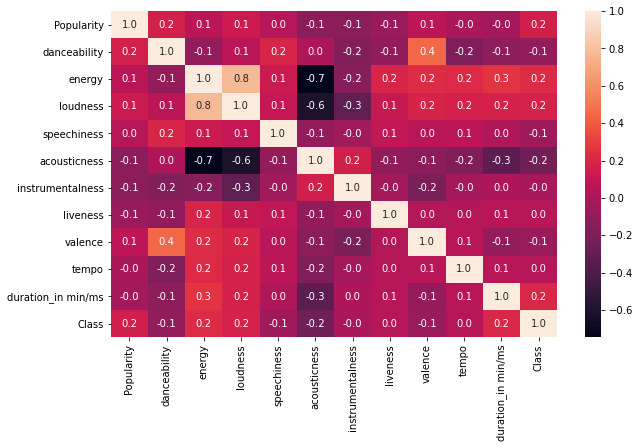

In [129]:
plt.figure(figsize=(10,6))
x=sns.heatmap(total.corr(),annot=True, fmt= '0.1f')
plt.show()

In [131]:
total.iloc[train.shape[0]:,:]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,7.562499734881054,7.6492523249858975,73.0,0.310,0.403,5.924692251991311,-13.664,1,0.0326,0.07260,0.000093,0.1390,0.466,134.480,318027.000000,4,NaN
1,6.899292407912251,6.673228318449742,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.00040,0.000009,0.2630,0.291,151.937,220413.000000,4,NaN
2,8.725335165338457,6.673228318449742,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.00480,0.170052,0.0289,0.625,122.019,202960.000000,4,NaN
3,8.380310903615904,6.695821293620805,80.0,0.333,0.637,1.0,-4.904,0,0.0581,0.13100,0.000018,0.1490,0.132,139.898,172693.000000,4,NaN
4,9.0,6.673228318449742,48.0,0.393,0.849,11.0,-4.114,1,0.0459,0.00421,0.170052,0.1620,0.222,74.028,4.093117,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708,8.99999999999999,6.673228318449742,28.0,0.816,0.927,7.0,-1.581,1,0.0600,0.26400,0.170052,0.0735,0.643,128.019,231680.000000,4,NaN
7709,6.899292407912251,7.700004654364769,45.0,0.429,0.599,7.0,-7.236,0,0.0363,0.02540,0.009330,0.3620,0.257,127.446,367879.000000,4,NaN
7710,6.899292407912251,6.673228318449742,38.0,0.805,0.905,6.0,-7.222,0,0.2750,0.15900,0.000011,0.0590,0.691,135.224,2.453550,4,NaN
7711,6.749950640424842,6.673228318449742,51.0,0.801,0.930,9.0,-7.365,1,0.0354,0.08060,0.152000,0.0558,0.967,133.255,221320.000000,4,NaN


In [11]:
def hist_boxplots(x):
    sns.set(style = 'darkgrid')
    
    f,(ax_box,ax_hist) = plt.subplots(2,sharex=True, gridspec_kw={'height_ratios':(0.15,0.85)})

    sns.boxplot(x,ax = ax_box)
    sns.histplot(x,ax = ax_hist)

    ax_box.set(xlabel = '')
    plt.show()

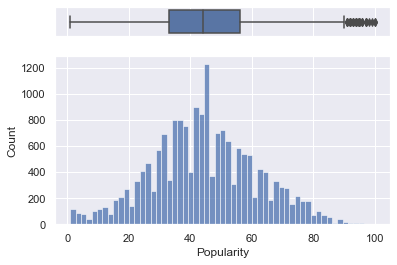

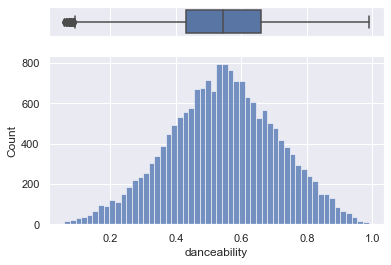

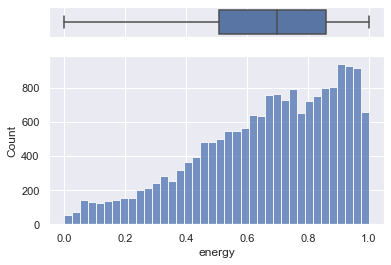

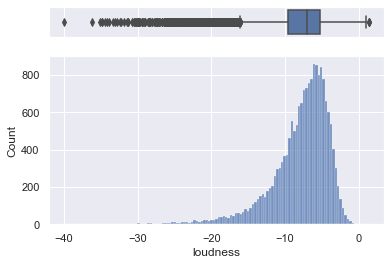

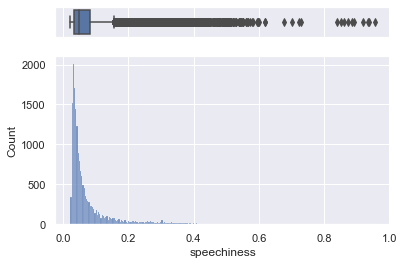

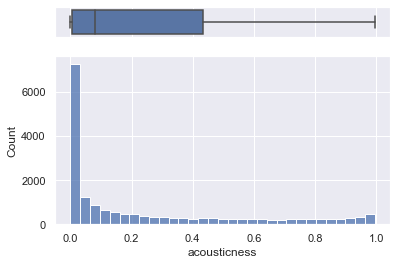

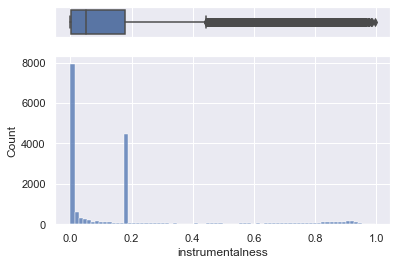

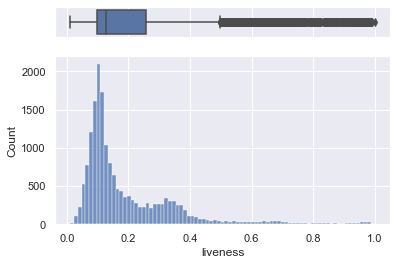

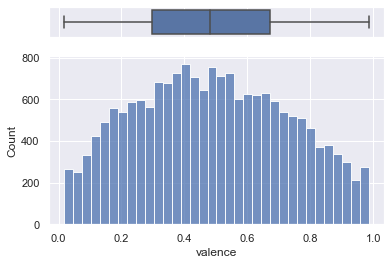

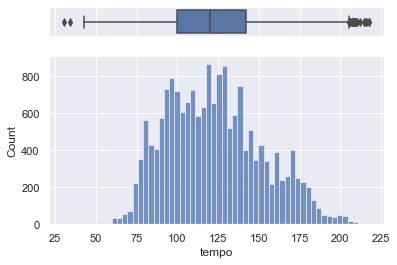

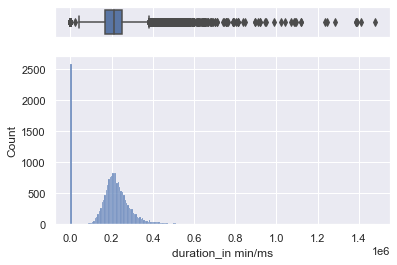

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),None,None,None,1.0,None,1,None,None,None,None,None,None,None,4,5
1,Boston,Hitch a Ride,None,None,None,3.0,None,1,None,None,None,None,None,None,None,4,10
2,The Raincoats,No Side to Fall In,None,None,None,6.0,None,1,None,None,None,None,None,None,None,4,6
3,Deno,Lingo (feat. J.I & Chunkz),None,None,None,10.0,None,0,None,None,None,None,None,None,None,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,None,None,None,2.0,None,1,None,None,None,None,None,None,None,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,None,None,None,7.0,None,0,None,None,None,None,None,None,None,3,6
17992,Micatone,All Gone,None,None,None,11.0,None,0,None,None,None,None,None,None,None,4,2
17993,Smash Hit Combo,Peine perdue,None,None,None,4.0,None,0,None,None,None,None,None,None,None,4,8
17994,Beherit,Salomon's Gate,None,None,None,6.0,None,0,None,None,None,None,None,None,None,4,8


In [12]:
train.apply(lambda x: hist_boxplots(x) if x.name in ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms'] else x)

In [13]:
def outlier_treat(x):
    Q3 = x.quantile(0.75)
    Q1 = x.quantile(0.25)
    IQR = Q3 -Q1
    lowerlimit = Q1 - 1.5*IQR
    upplimit = Q3 + 1.5*IQR
    x = np.where(x < lowerlimit,lowerlimit,np.where(x > upplimit, upplimit,x))
    return x

train = total.iloc[:train.shape[0],:].apply(lambda x: outlier_treat(x) if x.name in ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms'] else x)
test = total.iloc[train.shape[0]:,:].apply(lambda x: outlier_treat(x) if x.name in ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms'] else x)

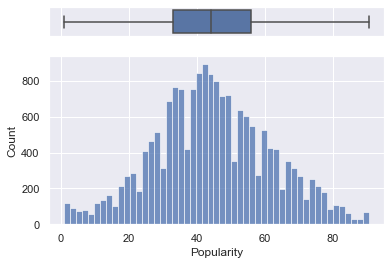

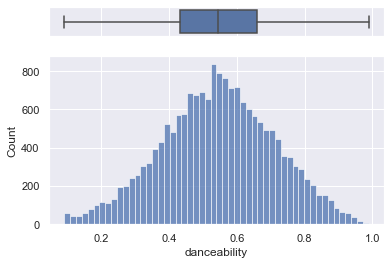

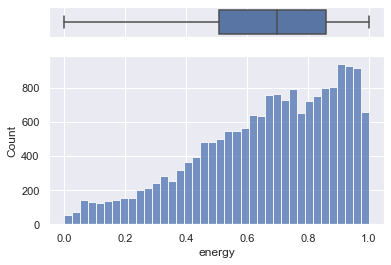

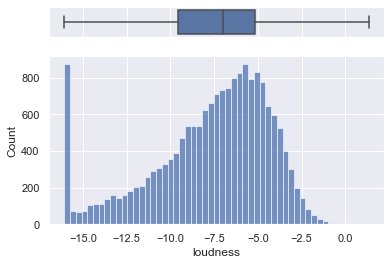

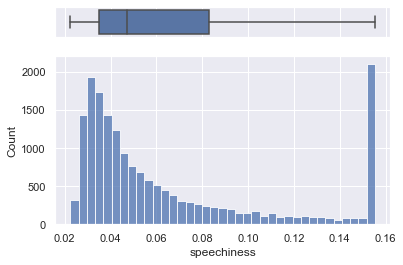

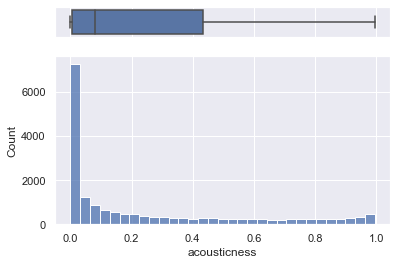

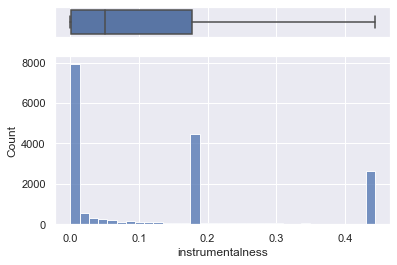

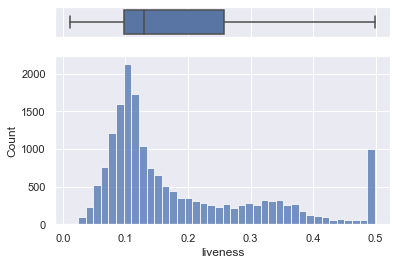

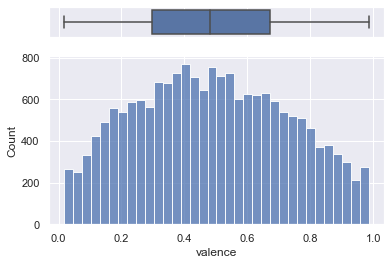

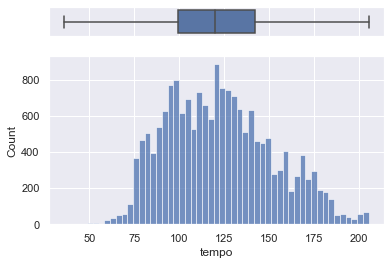

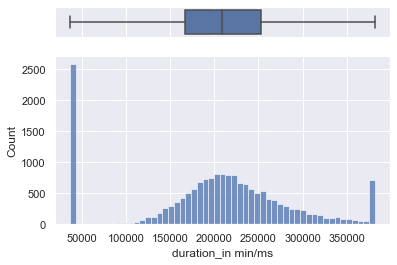

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,7.938148186070378,6.695821293620805,None,None,None,1.0,None,1,None,None,None,None,None,None,None,4,5.0
1,9.940570348034791,6.695821293620805,None,None,None,3.0,None,1,None,None,None,None,None,None,None,4,10.0
2,4.614948801441672,6.695821293620805,None,None,None,6.0,None,1,None,None,None,None,None,None,None,4,6.0
3,5.202146853426928,6.695821293620805,None,None,None,10.0,None,0,None,None,None,None,None,None,None,4,5.0
4,9.999997252482796,6.695821293620805,None,None,None,2.0,None,1,None,None,None,None,None,None,None,4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,6.08294393140481,6.695821293620805,None,None,None,7.0,None,0,None,None,None,None,None,None,None,3,6.0
17992,6.695821293620805,6.695821293620805,None,None,None,11.0,None,0,None,None,None,None,None,None,None,4,2.0
17993,6.695821293620805,6.695821293620805,None,None,None,4.0,None,0,None,None,None,None,None,None,None,4,8.0
17994,6.695821293620805,6.695821293620805,None,None,None,6.0,None,0,None,None,None,None,None,None,None,4,8.0


In [14]:
train.apply(lambda x: hist_boxplots(x) if x.name in ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms'] else x)

In [133]:
col_names = ['Popularity', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_in min/ms']

# Use scaler of choice; here Standard scaler is used
scaler = RobustScaler()
u = pd.DataFrame(scaler.fit_transform(train[col_names]), columns= col_names)
train[col_names] = u[col_names].values

#features = scaler.transform(features.values)
v = pd.DataFrame(scaler.transform(test[col_names]), columns= col_names)
test[col_names] = v[col_names].values
#scaled_features[col_names] = features

In [134]:
cat_cols = ['Artist Name','Track Name','key','mode','time_signature']

xtrain = train.iloc[:,:16]
ytrain = train.iloc[:,16]

xtrain1,xtest1,ytrain1,ytest1 = train_test_split(xtrain,ytrain, test_size = 0.3, random_state = 22)

xtest = test

Learning rate set to 0.09004
0:	learn: 2.2307552	total: 176ms	remaining: 2m 55s
1:	learn: 2.1018531	total: 368ms	remaining: 3m 3s
2:	learn: 1.9509719	total: 590ms	remaining: 3m 16s
3:	learn: 1.8454434	total: 800ms	remaining: 3m 19s
4:	learn: 1.7485489	total: 1.03s	remaining: 3m 25s
5:	learn: 1.6886300	total: 1.25s	remaining: 3m 26s
6:	learn: 1.6297763	total: 1.49s	remaining: 3m 31s
7:	learn: 1.5684068	total: 1.68s	remaining: 3m 28s
8:	learn: 1.5136361	total: 1.92s	remaining: 3m 31s
9:	learn: 1.4680788	total: 2.22s	remaining: 3m 39s
10:	learn: 1.4365724	total: 2.47s	remaining: 3m 41s
11:	learn: 1.4045269	total: 2.74s	remaining: 3m 45s
12:	learn: 1.3760523	total: 3.02s	remaining: 3m 49s
13:	learn: 1.3438307	total: 3.25s	remaining: 3m 48s
14:	learn: 1.3218607	total: 3.44s	remaining: 3m 46s
15:	learn: 1.2931660	total: 3.66s	remaining: 3m 45s
16:	learn: 1.2670813	total: 3.88s	remaining: 3m 44s
17:	learn: 1.2499980	total: 4.12s	remaining: 3m 44s
18:	learn: 1.2281189	total: 4.34s	remaining: 3

158:	learn: 0.7481058	total: 36.5s	remaining: 3m 13s
159:	learn: 0.7470584	total: 36.8s	remaining: 3m 13s
160:	learn: 0.7454490	total: 37.1s	remaining: 3m 13s
161:	learn: 0.7448570	total: 37.4s	remaining: 3m 13s
162:	learn: 0.7437775	total: 37.7s	remaining: 3m 13s
163:	learn: 0.7427194	total: 38s	remaining: 3m 13s
164:	learn: 0.7419216	total: 38.2s	remaining: 3m 13s
165:	learn: 0.7408720	total: 38.5s	remaining: 3m 13s
166:	learn: 0.7398414	total: 38.7s	remaining: 3m 13s
167:	learn: 0.7386046	total: 38.9s	remaining: 3m 12s
168:	learn: 0.7374829	total: 39.1s	remaining: 3m 12s
169:	learn: 0.7366963	total: 39.4s	remaining: 3m 12s
170:	learn: 0.7355503	total: 39.6s	remaining: 3m 12s
171:	learn: 0.7346992	total: 39.9s	remaining: 3m 11s
172:	learn: 0.7341557	total: 40.2s	remaining: 3m 12s
173:	learn: 0.7335157	total: 40.5s	remaining: 3m 12s
174:	learn: 0.7326704	total: 40.7s	remaining: 3m 12s
175:	learn: 0.7321544	total: 41s	remaining: 3m 12s
176:	learn: 0.7318383	total: 41.3s	remaining: 3m 1

315:	learn: 0.6398317	total: 1m 14s	remaining: 2m 40s
316:	learn: 0.6389456	total: 1m 14s	remaining: 2m 40s
317:	learn: 0.6379487	total: 1m 14s	remaining: 2m 40s
318:	learn: 0.6377544	total: 1m 14s	remaining: 2m 39s
319:	learn: 0.6375682	total: 1m 15s	remaining: 2m 39s
320:	learn: 0.6371309	total: 1m 15s	remaining: 2m 39s
321:	learn: 0.6361239	total: 1m 15s	remaining: 2m 39s
322:	learn: 0.6355876	total: 1m 16s	remaining: 2m 39s
323:	learn: 0.6352903	total: 1m 16s	remaining: 2m 39s
324:	learn: 0.6348849	total: 1m 16s	remaining: 2m 39s
325:	learn: 0.6344134	total: 1m 16s	remaining: 2m 38s
326:	learn: 0.6339570	total: 1m 17s	remaining: 2m 38s
327:	learn: 0.6336474	total: 1m 17s	remaining: 2m 38s
328:	learn: 0.6329033	total: 1m 17s	remaining: 2m 38s
329:	learn: 0.6325961	total: 1m 17s	remaining: 2m 37s
330:	learn: 0.6323291	total: 1m 18s	remaining: 2m 37s
331:	learn: 0.6316674	total: 1m 18s	remaining: 2m 37s
332:	learn: 0.6312689	total: 1m 18s	remaining: 2m 37s
333:	learn: 0.6308730	total:

468:	learn: 0.5668274	total: 1m 51s	remaining: 2m 5s
469:	learn: 0.5666754	total: 1m 51s	remaining: 2m 5s
470:	learn: 0.5663364	total: 1m 51s	remaining: 2m 5s
471:	learn: 0.5657421	total: 1m 51s	remaining: 2m 5s
472:	learn: 0.5653506	total: 1m 52s	remaining: 2m 4s
473:	learn: 0.5649168	total: 1m 52s	remaining: 2m 4s
474:	learn: 0.5640069	total: 1m 52s	remaining: 2m 4s
475:	learn: 0.5637307	total: 1m 52s	remaining: 2m 4s
476:	learn: 0.5634206	total: 1m 53s	remaining: 2m 3s
477:	learn: 0.5630283	total: 1m 53s	remaining: 2m 3s
478:	learn: 0.5626055	total: 1m 53s	remaining: 2m 3s
479:	learn: 0.5622836	total: 1m 53s	remaining: 2m 3s
480:	learn: 0.5617706	total: 1m 53s	remaining: 2m 2s
481:	learn: 0.5610715	total: 1m 54s	remaining: 2m 2s
482:	learn: 0.5608261	total: 1m 54s	remaining: 2m 2s
483:	learn: 0.5602118	total: 1m 54s	remaining: 2m 2s
484:	learn: 0.5599940	total: 1m 54s	remaining: 2m 1s
485:	learn: 0.5591530	total: 1m 55s	remaining: 2m 1s
486:	learn: 0.5587796	total: 1m 55s	remaining:

622:	learn: 0.5079971	total: 2m 28s	remaining: 1m 29s
623:	learn: 0.5078676	total: 2m 28s	remaining: 1m 29s
624:	learn: 0.5075533	total: 2m 28s	remaining: 1m 29s
625:	learn: 0.5067543	total: 2m 29s	remaining: 1m 29s
626:	learn: 0.5064996	total: 2m 29s	remaining: 1m 28s
627:	learn: 0.5063484	total: 2m 29s	remaining: 1m 28s
628:	learn: 0.5058635	total: 2m 29s	remaining: 1m 28s
629:	learn: 0.5056412	total: 2m 30s	remaining: 1m 28s
630:	learn: 0.5054582	total: 2m 30s	remaining: 1m 27s
631:	learn: 0.5048233	total: 2m 30s	remaining: 1m 27s
632:	learn: 0.5045049	total: 2m 30s	remaining: 1m 27s
633:	learn: 0.5041254	total: 2m 31s	remaining: 1m 27s
634:	learn: 0.5037449	total: 2m 31s	remaining: 1m 26s
635:	learn: 0.5033911	total: 2m 31s	remaining: 1m 26s
636:	learn: 0.5028201	total: 2m 31s	remaining: 1m 26s
637:	learn: 0.5024893	total: 2m 32s	remaining: 1m 26s
638:	learn: 0.5022161	total: 2m 32s	remaining: 1m 26s
639:	learn: 0.5020922	total: 2m 32s	remaining: 1m 25s
640:	learn: 0.5017223	total:

777:	learn: 0.4567448	total: 3m 5s	remaining: 53s
778:	learn: 0.4563641	total: 3m 6s	remaining: 52.8s
779:	learn: 0.4561183	total: 3m 6s	remaining: 52.5s
780:	learn: 0.4557753	total: 3m 6s	remaining: 52.3s
781:	learn: 0.4552459	total: 3m 6s	remaining: 52s
782:	learn: 0.4548281	total: 3m 6s	remaining: 51.8s
783:	learn: 0.4546588	total: 3m 7s	remaining: 51.6s
784:	learn: 0.4542974	total: 3m 7s	remaining: 51.3s
785:	learn: 0.4539725	total: 3m 7s	remaining: 51.1s
786:	learn: 0.4536939	total: 3m 7s	remaining: 50.8s
787:	learn: 0.4533686	total: 3m 8s	remaining: 50.6s
788:	learn: 0.4531851	total: 3m 8s	remaining: 50.4s
789:	learn: 0.4528420	total: 3m 8s	remaining: 50.1s
790:	learn: 0.4525102	total: 3m 8s	remaining: 49.9s
791:	learn: 0.4521451	total: 3m 9s	remaining: 49.6s
792:	learn: 0.4519268	total: 3m 9s	remaining: 49.4s
793:	learn: 0.4514947	total: 3m 9s	remaining: 49.1s
794:	learn: 0.4510593	total: 3m 9s	remaining: 48.9s
795:	learn: 0.4507766	total: 3m 9s	remaining: 48.7s
796:	learn: 0.45

933:	learn: 0.4101095	total: 3m 43s	remaining: 15.8s
934:	learn: 0.4099671	total: 3m 43s	remaining: 15.5s
935:	learn: 0.4097754	total: 3m 43s	remaining: 15.3s
936:	learn: 0.4094656	total: 3m 44s	remaining: 15.1s
937:	learn: 0.4092318	total: 3m 44s	remaining: 14.8s
938:	learn: 0.4088536	total: 3m 44s	remaining: 14.6s
939:	learn: 0.4086403	total: 3m 44s	remaining: 14.3s
940:	learn: 0.4084380	total: 3m 44s	remaining: 14.1s
941:	learn: 0.4081609	total: 3m 45s	remaining: 13.9s
942:	learn: 0.4079651	total: 3m 45s	remaining: 13.6s
943:	learn: 0.4076629	total: 3m 45s	remaining: 13.4s
944:	learn: 0.4073235	total: 3m 45s	remaining: 13.2s
945:	learn: 0.4072215	total: 3m 46s	remaining: 12.9s
946:	learn: 0.4069429	total: 3m 46s	remaining: 12.7s
947:	learn: 0.4066598	total: 3m 46s	remaining: 12.4s
948:	learn: 0.4063645	total: 3m 46s	remaining: 12.2s
949:	learn: 0.4060395	total: 3m 47s	remaining: 12s
950:	learn: 0.4058378	total: 3m 47s	remaining: 11.7s
951:	learn: 0.4056604	total: 3m 47s	remaining: 1

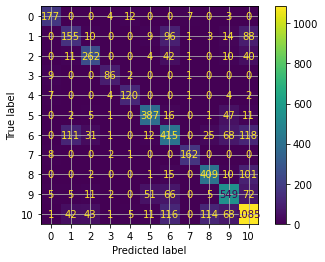

In [136]:
from catboost import CatBoostClassifier

sv = CatBoostClassifier()
sv.fit(xtrain1,ytrain1, cat_features= cat_cols)
y_pred_lr = sv.predict(xtest1)

cm = confusion_matrix(ytest1,y_pred_lr)
acc = accuracy_score(ytest1,y_pred_lr)*100
print('log loss is', log_loss(ytest1,sv.predict_proba(xtest1)))
print(classification_report(ytest1,y_pred_lr))
print('accuracy of model is {}'.format(acc))
ConfusionMatrixDisplay(cm).plot(include_values=True)
plt.grid()
plt.show()

In [140]:
y_pred = sv.predict_proba(xtest)


array([2.29805963e-05, 5.17087370e-03, 1.90226798e-03, 1.29084943e-05,
       1.37136930e-04, 8.97673734e-04, 2.03325982e-01, 1.73942152e-05,
       2.51286073e-02, 3.67357733e-02, 7.26648402e-01])

In [142]:
sub_temp = pd.read_csv("C:\\Users\\dell\\Desktop\\Project Competitions\\Musicgenre_machine_hack\\Dataset_MGP_LHS\\submission.csv")
finalpreds = pd.DataFrame(y_pred)
finalpreds.columns = sub_temp.columns
finalpreds.to_csv("C:\\Users\\dell\\Desktop\\Project Competitions\\Musicgenre_machine_hack\\Dataset_MGP_LHS\\submit.csv",index=False)